In [1]:
"""import packages you need"""
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt 

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [2]:
df_0 = pd.read_csv('RawData/two_widths/Param0_2width.csv')
df_1 = pd.read_csv('RawData/two_widths/Param1_2width.csv')
df_2 = pd.read_csv('RawData/two_widths/Param2_2width.csv')
df_3 = pd.read_csv('RawData/two_widths/Param3_2width.csv')
df_4 = pd.read_csv('RawData/two_widths/Param4_2width.csv')


df1 = pd.concat([df_0, df_1, df_2, df_3, df_4], axis = 0, ignore_index = True)
# # combined_Exp = pd.read_csv('RawData/AllExpData_tuned.csv')


# grp = df1.groupby(['Frequency', 'Speed', 'Amplitude','Passes','Focal_Position'], as_index=False).mean()
# combined_Exp = grp


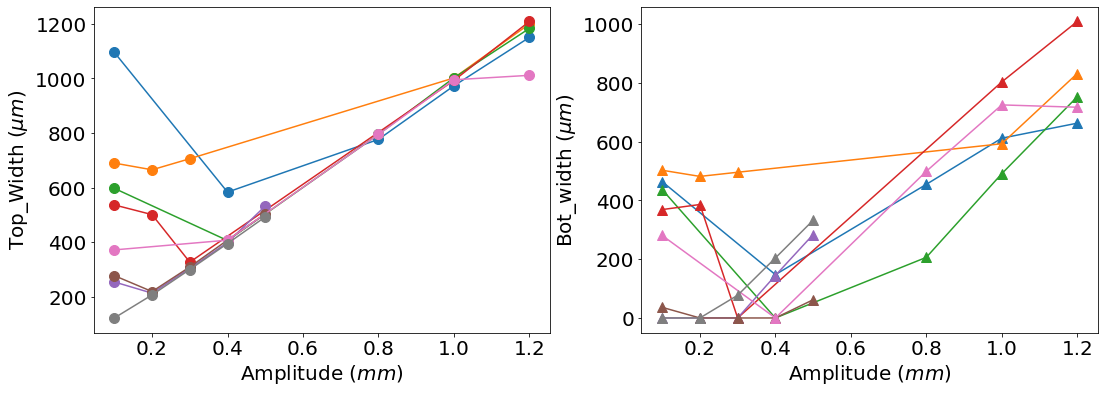

In [4]:
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

plt.subplots_adjust(wspace=0.2)

grouped_df = df1.groupby(['Frequency', 'Speed', \
                                'Passes', 'Focal_Position'], as_index=False)
for key, item in grouped_df:
    if item.shape[0] > 4 :
#     print(grouped_df.get_group(key), "\n\n")
        ax1.plot(grouped_df.get_group(key).Amplitude,grouped_df.get_group(key).Top_width, 'o-',ms=10)
        ax2.plot(grouped_df.get_group(key).Amplitude,grouped_df.get_group(key).Bot_width, '^-',ms=10)
# ax1.legend()
# ax2.legend()
ax1.set_xlabel('Amplitude ($mm$)', fontsize=20)
ax1.set_ylabel('Top_Width ($\\mu m$)', fontsize=20)

ax2.set_xlabel('Amplitude ($mm$)', fontsize=20)
ax2.set_ylabel('Bot_width ($\\mu m$)', fontsize=20)

ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
plt.show()

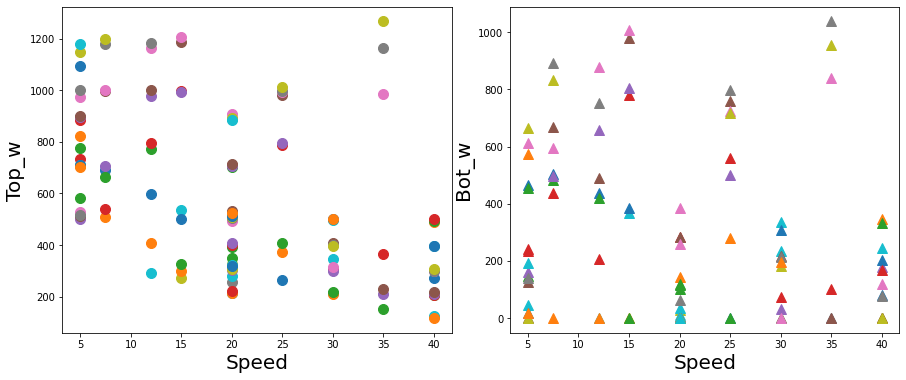

In [5]:
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

plt.subplots_adjust(wspace=0.15)
# df2_clean = df2_clean.groupby(['Frequency', 'Speed', 'Amplitude', 'Passes','Focal_Position'],\
#                   as_index=False).mean()
grouped_df = df1.groupby(['Frequency', 'Amplitude', \
                                'Passes','Focal_Position'], as_index=False)
for key, item in grouped_df:
#     if item.shape[0] > 1 :
#     print(grouped_df.get_group(key), "\n\n")
    ax1.plot(grouped_df.get_group(key).Speed, grouped_df.get_group(key).Top_width, 'o-',ms=10)
    ax2.plot(grouped_df.get_group(key).Speed, grouped_df.get_group(key).Bot_width, '^-',ms=10)
# plt.legend()
ax1.set_xlabel('Speed', fontsize=20)
ax1.set_ylabel('Top_w', fontsize=20)

ax2.set_xlabel('Speed', fontsize=20)
ax2.set_ylabel('Bot_w', fontsize=20)
plt.show()

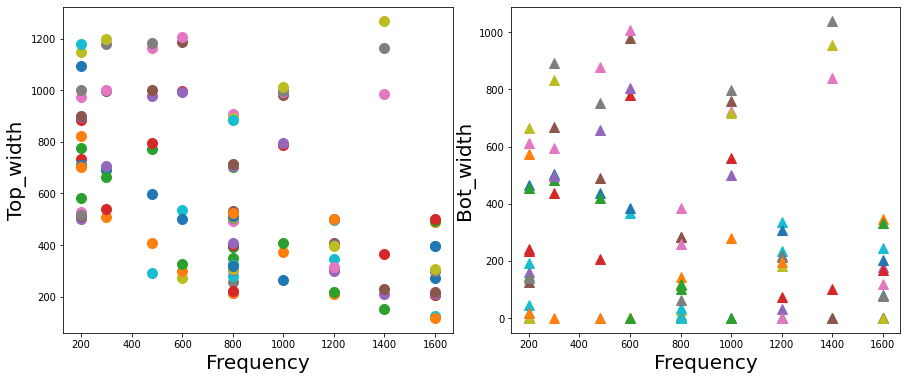

In [6]:
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

plt.subplots_adjust(wspace=0.15)
# df2_clean = df2_clean.groupby(['Frequency', 'Speed', 'Amplitude', 'Passes','Focal_Position'],\
#                   as_index=False).mean()
grouped_df = df1.groupby(['Speed', 'Amplitude', \
                                'Passes','Focal_Position'], as_index=False)
for key, item in grouped_df:
#     print(grouped_df.get_group(key), "\n\n")
    ax1.plot(grouped_df.get_group(key).Frequency, grouped_df.get_group(key).Top_width, 'o-',ms=10)
    ax2.plot(grouped_df.get_group(key).Frequency, grouped_df.get_group(key).Bot_width, '^-',ms=10)
# plt.legend()
ax1.set_xlabel('Frequency', fontsize=20)
ax1.set_ylabel('Top_width', fontsize=20)

ax2.set_xlabel('Frequency', fontsize=20)
ax2.set_ylabel('Bot_width', fontsize=20)
plt.show()

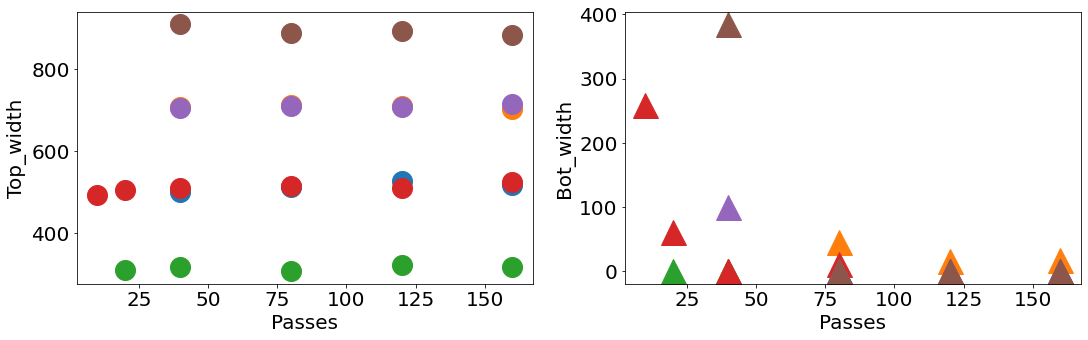

In [13]:
fig = plt.figure(figsize=(18,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

plt.subplots_adjust(wspace=0.2)
# df2_clean = df2_clean.groupby(['Frequency', 'Speed', 'Amplitude', 'Passes','Focal_Position'],\
#                   as_index=False).mean()
grouped_df = df1.groupby(['Focal_Position', 'Frequency','Speed', 'Amplitude'\
                                ], as_index=False)
for key, item in grouped_df:
    if item.shape[0] > 3 :
#         print(grouped_df.get_group(key), "\n\n")
        ax1.plot(grouped_df.get_group(key).Passes,\
                 grouped_df.get_group(key).Top_width, 'o',ms=20)
        ax2.plot(grouped_df.get_group(key).Passes, \
                 grouped_df.get_group(key).Bot_width, '^',ms=25)
# plt.legend()
ax1.set_xlabel('Passes', fontsize=20)
ax1.set_ylabel('Top_width', fontsize=20)

ax2.set_xlabel('Passes', fontsize=20)
ax2.set_ylabel('Bot_width', fontsize=20)


ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
plt.show()

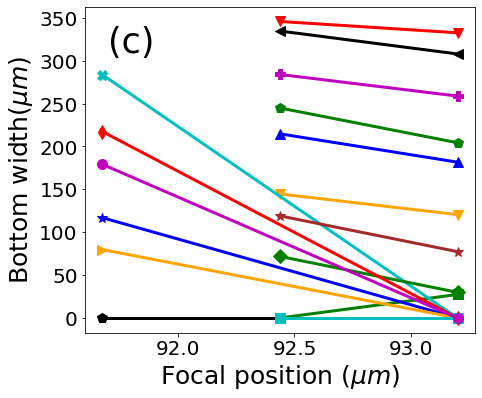

In [19]:
fig = plt.figure(figsize=(7,6))
ax2 = fig.add_subplot(111)
# ax2 = fig.add_subplot(122)

plt.subplots_adjust(wspace=0.2)
# df2_clean = df2_clean.groupby(['Frequency', 'Speed', 'Amplitude', 'Passes','Focal_Position'],\
#                   as_index=False).mean()
grouped_df = df1.groupby(['Frequency', 'Amplitude', \
                             'Speed','Passes'], as_index=False)

colors = ["g","r", "b", "k", "orange", "c", "m", 'brown']
markers = ["s", "o", "*", "p","v" ,"X", "P", "h", "D", "d",  "^", "<", ">"]


i = -1
for key, item in grouped_df:
    if item.shape[0] > 1 :
        i += 1
#     print(grouped_df.get_group(key), "\n\n")
#         ax1.plot(grouped_df.get_group(key).Focal_Position,\
#                  grouped_df.get_group(key).Top_width, \
#                  marker=markers[i%13],c = colors[i%8],lw=3,ms=10)
        ax2.plot(grouped_df.get_group(key).Focal_Position,\
                 grouped_df.get_group(key).Bot_width, \
                 marker=markers[i%13],c = colors[i%8],lw=3,ms=10)
# plt.legend()
# ax1.text(91.7,490,'(b)',fontsize= 35)
ax2.text(91.7,310,'(c)',fontsize= 35)
# ax1.set_xlabel('Focal position ($\\mu m$)', fontsize=25)
# ax1.set_ylabel('Top width ($\\mu m$)', fontsize=25)

ax2.set_xlabel('Focal position ($\\mu m$)', fontsize=25)
ax2.set_ylabel('Bottom width($\\mu m$)', fontsize=25)

# ax1.tick_params(axis='x', labelsize=20)
# ax1.tick_params(axis='y', labelsize=20)
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
# plt.savefig('Graphs/Topwidth_focPos.png',bbox_inches='tight')
plt.savefig('Graphs/Botwidth_focPos.png',bbox_inches='tight')



# 
plt.show()

# Linear regression to show the general trend

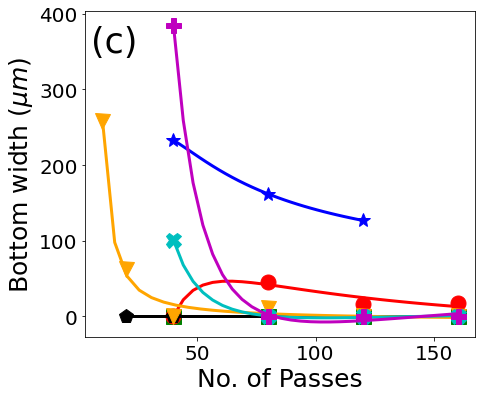

In [23]:
fig = plt.figure(figsize=(7,6))
ax2 = fig.add_subplot(111)
# ax2 = fig.add_subplot(122)

plt.subplots_adjust(wspace=0.2)
model1 = Pipeline([
    ('linear_regression', LinearRegression())
])

grouped_df = df1.groupby(['Frequency', 'Speed','Amplitude' \
                                , 'Focal_Position'], as_index=False)
colors = ["g","r", "b", "k", "orange", "c", "m", 'brown']
markers = ["s", "o", "*", "p","v" ,"X", "P", "h", "D", "d",  "^", "<", ">"]

i = 0
for key, item in grouped_df:
    
    if item.shape[0] >= 3 :
        x = grouped_df.get_group(key).Passes
#         y = grouped_df.get_group(key).Top_width
#         Model1 = model1.fit((np.array(x)).reshape(-1,1), y)
#         y_ln = Model1.predict((np.array(x)).reshape(-1,1))
#         ax1.plot(x,y, marker=markers[i%14],c = colors[i%8],lw=0, ms=15)
#         ax1.plot(x,y_ln, '-',c = colors[i%8], lw=3)
        z = grouped_df.get_group(key).Bot_width
        LR2 = LinearRegression()
        X2 = np.c_[np.ones(len(z)),x.values ** (-1),\
                  x.values ** (-3)]
        result = LR2.fit(X2, z)
        xx = np.linspace(min(x.values), max(x.values), 30)
        Xcont = np.c_[np.ones(len(xx)), 1/xx, 1/(xx**3)]
        zp = LR2.predict(Xcont)
        ax2.plot(x, z,marker=markers[i%14],lw=0, c = colors[i%8],ms=15)
        ax2.plot(xx,zp, c = colors[i%8], lw=3)
        
        i += 1

# ax1.text(5,860,'(b)',fontsize= 35)
ax2.text(5,350,'(c)',fontsize= 35)
# ax1.set_xlabel('No. of Passes', fontsize=25)
# ax1.set_ylabel('Top width ($\\mu m$)', fontsize=25)
ax2.set_xlabel('No. of Passes', fontsize=25)
ax2.set_ylabel('Bottom width ($\\mu m$)', fontsize=25)
# ax1.tick_params(axis='x', labelsize=20)
# ax1.tick_params(axis='y', labelsize=20)
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
# plt.savefig('Graphs/Topwidth_passes.png',bbox_inches='tight')
plt.savefig('Graphs/Botwidth_passes.png',bbox_inches='tight')



plt.show()

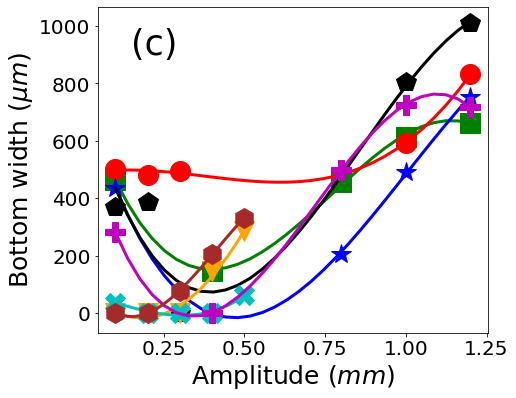

In [25]:
fig = plt.figure(figsize=(7,6))
ax2 = fig.add_subplot(111)
# ax2 = fig.add_subplot(122)

plt.subplots_adjust(wspace=0.25)
model1 = Pipeline([
    ('linear_regression', LinearRegression())
])

grouped_df = df1.groupby(['Frequency', 'Speed','Passes' \
                                , 'Focal_Position'], as_index=False)
colors = ["g","r", "b", "k", "orange", "c", "m", 'brown']
markers = ["s", "o", "*", "p","v" ,"X", "P", "h", "D", "d",  "^", "<", ">"]
LR2 = LinearRegression()
i = 0
for key, item in grouped_df:
    
    if item.shape[0] >= 5 :
        x = grouped_df.get_group(key).Amplitude
#         y = grouped_df.get_group(key).Top_width
# #         Model1 = model1.fit((np.array(x)).reshape(-1,1), y)
# #         y_ln = Model1.predict((np.array(x)).reshape(-1,1))
#         X2 = np.c_[np.ones(len(y)),x.values, x.values ** (2), x.values ** (3)]
#         result = LR2.fit(X2, y)
#         xx = np.linspace(min(x.values), max(x.values), 30)
#         Xcont = np.c_[np.ones(len(xx)), (xx),(xx**2), (xx**3)]
#         yp = LR2.predict(Xcont)
#         ax1.plot(x,y, marker=markers[i%13],c = colors[i%8],lw=0, ms=20)
#         ax1.plot(xx,yp, '-',c = colors[i%8], lw = 3)
        z = grouped_df.get_group(key).Bot_width
        X2 = np.c_[np.ones(len(z)),x.values, x.values**2, x.values**3]
        result = LR2.fit(X2, z)
        xx = np.linspace(min(x.values), max(x.values), 30)
        Xcont = np.c_[np.ones(len(xx)),xx, xx**2, xx**3]
        zp = LR2.predict(Xcont)
        ax2.plot(x, z,marker=markers[i%13],lw=0, c = colors[i%8],ms=20)
        ax2.plot(xx,zp, c = colors[i%8], lw=3)
        
        i += 1

# ax1.text(0.15,1100,'(b)',fontsize= 35)
ax2.text(0.15,900,'(c)',fontsize= 35)
# ax1.set_xlabel('Amplitude ($m m$)', fontsize=25)
# ax1.set_ylabel('Top width ($\\mu m$)', fontsize=25)
ax2.set_xlabel('Amplitude ($m m$)', fontsize=25)
ax2.set_ylabel('Bottom width ($\\mu m$)', fontsize=25)
# ax1.tick_params(axis='x', labelsize=20)
# ax1.tick_params(axis='y', labelsize=20)
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
# plt.savefig('Graphs/topwidth_Amplitude.png',bbox_inches='tight')
plt.savefig('Graphs/botwidth_Amplitude.png',bbox_inches='tight')


plt.show()

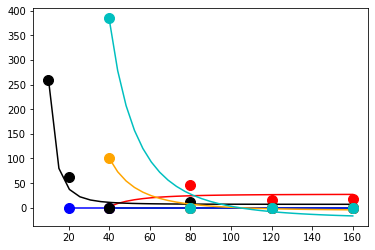

In [117]:
# def nonlinear_dep(d):
#     return 1/d
i = -1
for key, item in grouped_df:
        
    if item.shape[0] >= 4 :
        i += 1
        x = grouped_df.get_group(key).Passes
        y = grouped_df.get_group(key).Bot_width

        LR2 = LinearRegression()
        X2 = np.c_[np.ones(len(y)), x.values ** (-3)]
        result = LR2.fit(X2, y)
        xx = np.linspace(min(x.values), max(x.values), 30)
        Xcont = np.c_[np.ones(len(xx)), 1/(xx**3)]
        yp = LR2.predict(Xcont)
        plt.plot(x, y, 'o', c = colors[i%8],ms=10)
        plt.plot(xx,yp, c = colors[i%8],ms=10)

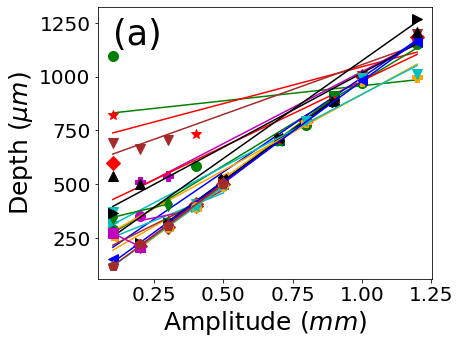

In [78]:
fig = plt.figure(figsize=(6,5))

model1 = Pipeline([
    ('linear_regression', LinearRegression())
])

grouped_df = df1.groupby(['Frequency', 'Speed', \
                                'Passes', 'Focal_Position'], as_index=False)
colors = ["g","r", "b", "k", "orange", "c", "m", 'brown']
markers = ["o", "*", "s", "p", "x", "X", "P", "v", "h", "D", "d",  "^", "<", ">"]

i = 0
for key, item in grouped_df:
    
    if item.shape[0] >= 2 :
        x = grouped_df.get_group(key).Amplitude
        y = grouped_df.get_group(key).Top_width
        Model1 = model1.fit((np.array(x)).reshape(-1,1), y)
        y_ln = Model1.predict((np.array(x)).reshape(-1,1))
        plt.plot(x,y,marker=markers[i%14],c = colors[i%8],lw=0, ms=10)
        plt.plot(x,y_ln, '-',c = colors[i%8],ms=10)
        i += 1

plt.text(0.1,1150,'(a)',fontsize= 35)
plt.xlabel('Amplitude ($mm$)', fontsize=25)
plt.ylabel('Depth ($\\mu m$)', fontsize=25)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
# plt.savefig('Graphs/Depth_Amp.png',bbox_inches='tight')


plt.show()